The VGG() class takes a few arguments

1) include_top (True): Whether or not to include the output layers for the model. You don’t need these if you are fitting the model on your own problem.

2) weights (‘imagenet‘): What weights to load. You can specify None to not load pre-trained weights if you are interested in training the model yourself from scratch.

3) input_tensor (None): A new input layer if you intend to fit the model on new data of a different size.

4) input_shape (None): The size of images that the model is expected to take if you change the input layer.

5) pooling (None): The type of pooling to use when you are training a new set of output layers.

6) classes (1000): The number of classes (e.g. size of output vector) for the model.

In [31]:
# https://github.com/tensorflow/docs/blob/master/site/en/tutorials/images/transfer_learning.ipynb
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow.keras.datasets import cifar10

In [32]:
(trainX, trainy), (testX, testy) = cifar10.load_data()

In [33]:
print(len(trainX),trainX.shape)
print(len(trainy))
print(len(testX),testX.shape)
print(len(testy))

50000 (50000, 32, 32, 3)
50000
10000 (10000, 32, 32, 3)
10000


In [34]:
from tensorflow.keras.applications.vgg16 import VGG16
model = VGG16()

In [35]:
catagories = {'dog': 0,'automobile': 1,'bird': 2,'cat': 3,'deer': 4,'airplane': 5,'frog': 6,'horse': 7,'ship': 8,'truck': 9}
reverse_catagory = {n:i for i,n in catagories.items()}
print(reverse_catagory)

{0: 'dog', 1: 'automobile', 2: 'bird', 3: 'cat', 4: 'deer', 5: 'airplane', 6: 'frog', 7: 'horse', 8: 'ship', 9: 'truck'}


In [36]:
IMG_SIZE = 160 # All images will be resized to 160x160

def format_example(img, label):
    img = tf.cast(img, tf.float32)
    img = (img/127.5) - 1
    img = tf.image.resize(img, (IMG_SIZE, IMG_SIZE))
    output = []
    output.append(img)
    output.append(label[0])
    return output

In [37]:
train_dataset = []
validation_dataset = []
test_dataset = []

for img_num in range(0,45000):
    train_dataset.append(format_example(trainX[img_num],trainy[img_num]))

In [38]:
train_dataset[0][1]

6

In [39]:
for img_num in range(45000,len(trainX)):
    validation_dataset.append(format_example(trainX[img_num],trainy[img_num]))

for img_num in range(len(testX)):
    train_dataset.append(format_example(testX[img_num],testy[img_num]))

In [40]:
print(len(trainX),len(train_dataset),len(validation_dataset),len(train_dataset))

50000 55000 5000 55000


In [41]:
BATCH_SIZE = 32
SHUFFLE_BUFFER_SIZE = 1000

In [42]:
train_dataframe = pd.DataFrame(train_dataset)
print(train_dataset.head())

AttributeError: 'list' object has no attribute 'head'

In [ ]:
validation_dataframe = pd.DataFrame(validation_dataset)
train_dataframe = pd.DataFrame(train_dataset)

In [29]:
# train_batches = train_dataset.shuffle(SHUFFLE_BUFFER_SIZE).batch(BATCH_SIZE)
# validation_batches = validation_dataset.batch(BATCH_SIZE)
# test_batches = train_dataset.batch(BATCH_SIZE)

AttributeError: 'DataFrame' object has no attribute 'shuffle'

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(160, 160, 3)
(160, 160, 3)
(160, 160, 3)


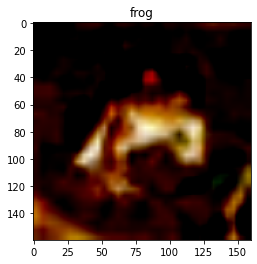

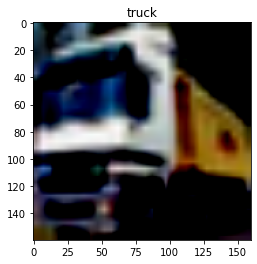

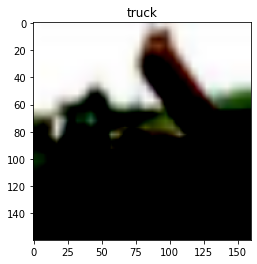

In [25]:
#check
for i in range(3):
    plt.figure()
    plt.imshow(train_dataset[i][0])
    # print("reverse_catagory[y_train[i]]: ",reverse_catagory[y_train[i][0]])
    plt.title(reverse_catagory[train_dataset[i][1]])
    print(train_dataset[i][0].shape)

In [ ]:
from tensorflow.keras.applications import MobileNetV2
IMG_SHAPE = (IMG_SIZE, IMG_SIZE, 3)

# Create the base model from the pre-trained model MobileNet V2
base_model = MobileNetV2(input_shape=IMG_SHAPE,
                                               include_top=False,
                                               weights='imagenet')

In [ ]:
from tensorflow.keras.utils.vis_utils import plot_model

In [ ]:
plot_model(model, to_file='vgg.png')